<a href="https://colab.research.google.com/github/GreyJX92/HR-Analytics/blob/main/210728_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/HR_dataset.csv")

In [ ]:
df.head()

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [ ]:
corr = df.corr()

In [ ]:
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105077,-0.142908,-0.020013,-0.100803,0.058673,-0.388225,0.025596
last_evaluation,0.105077,1.000000,0.349380,0.339770,0.131658,-0.007135,0.006701,-0.008695
number_project,-0.142908,0.349380,1.000000,0.417232,0.196839,-0.004767,0.023900,-0.006073
average_monthly_hours,-0.020013,0.339770,0.417232,1.000000,0.127791,-0.010160,0.071353,-0.003550
exp_in_company,-0.100803,0.131658,0.196839,0.127791,1.000000,0.002092,0.144924,0.067420
work_accident,0.058673,-0.007135,-0.004767,-0.010160,0.002092,1.000000,-0.154653,0.039249
left,-0.388225,0.006701,0.023900,0.071353,0.144924,-0.154653,1.000000,-0.061799
promotion_last_5years,0.025596,-0.008695,-0.006073,-0.003550,0.067420,0.039249,-0.061799,1.000000


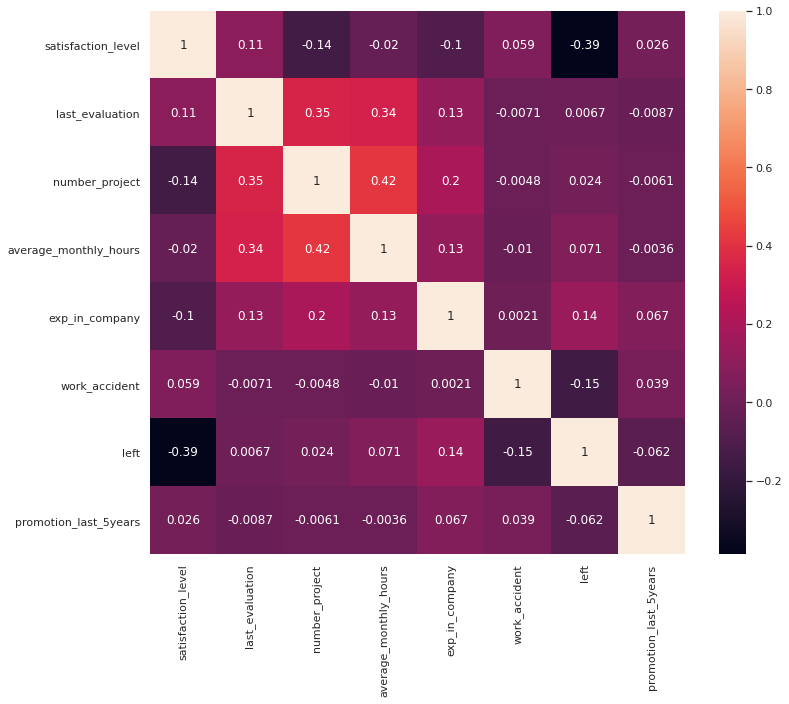

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr,annot=True)


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


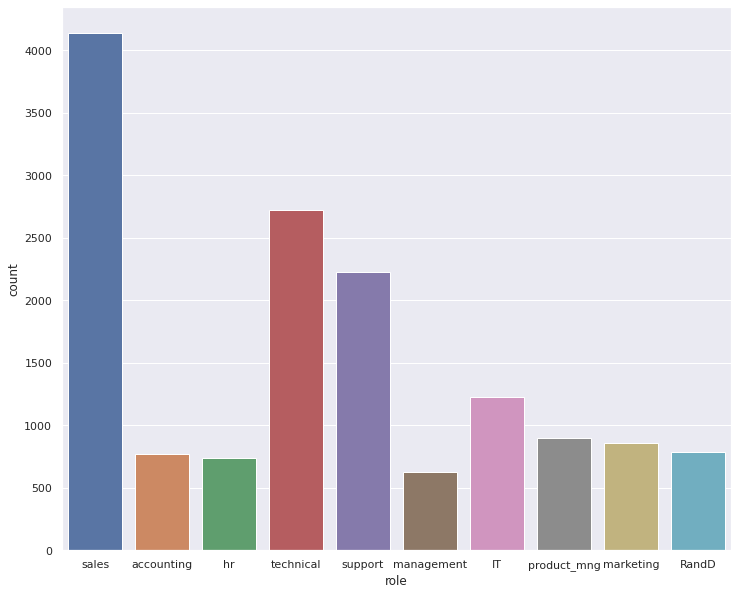

In [ ]:
ax = sns.countplot(x="role", data=df)
sns.set(rc={'figure.figsize':(18,10)})

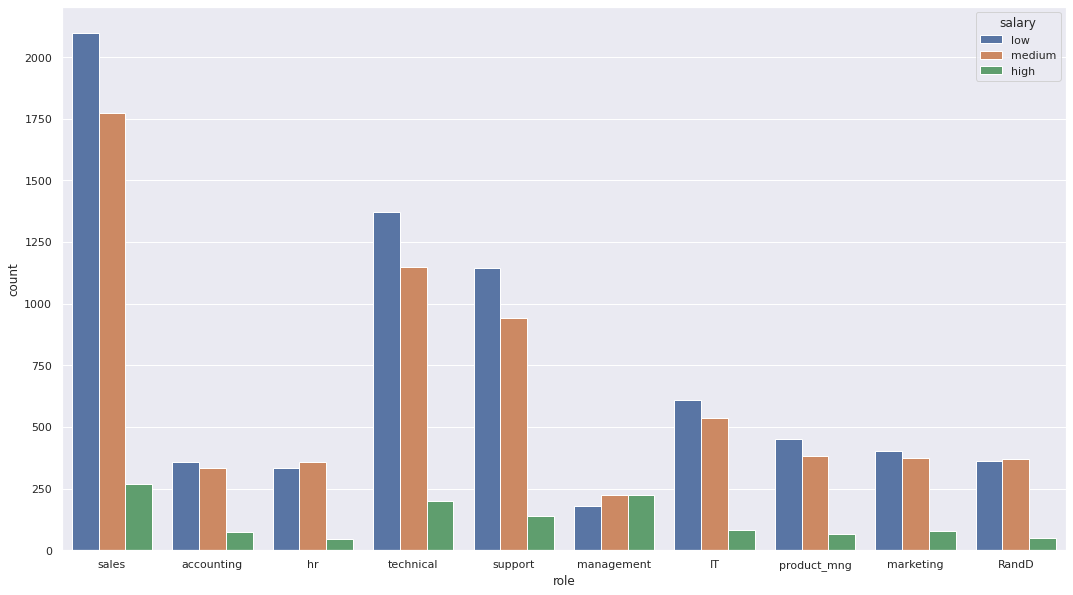

In [ ]:
ax = sns.countplot(x="role", hue="salary", data=df)
sns.set(rc={'figure.figsize':(20,10)})

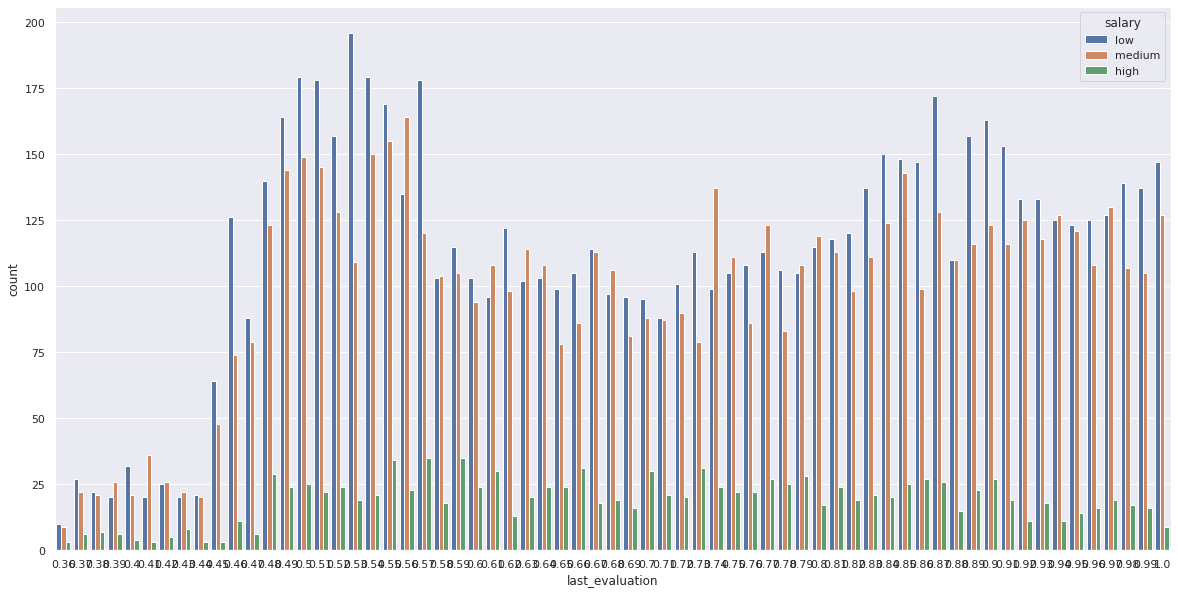

In [ ]:
ax = sns.countplot(x="last_evaluation", hue= "salary", data=df)
sns.set(rc={'figure.figsize':(22,10)})

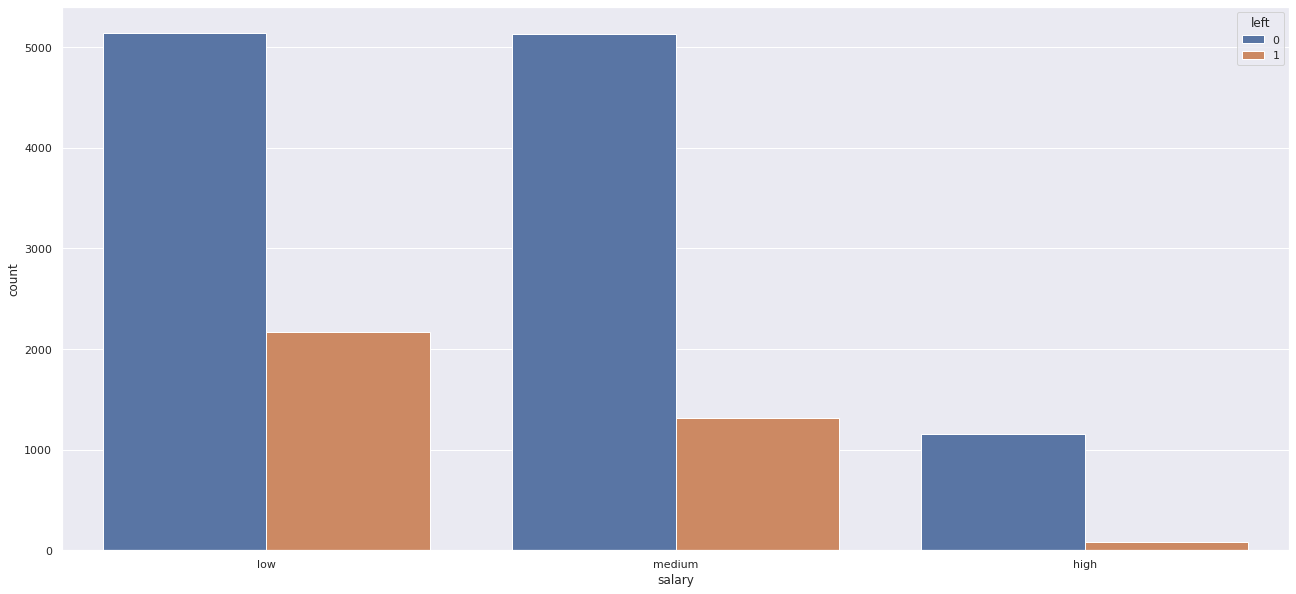

In [ ]:
ax = sns.countplot(x="salary", hue="left", data=df)

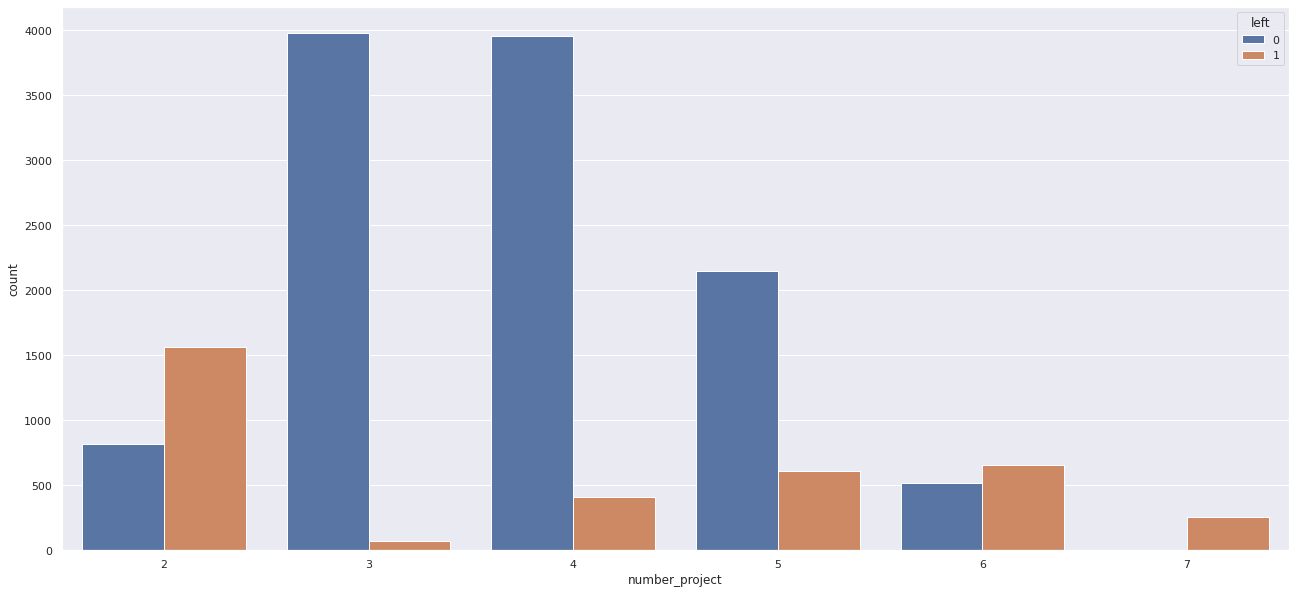

In [ ]:
ax = sns.countplot(x="number_project", hue="left", data=df)

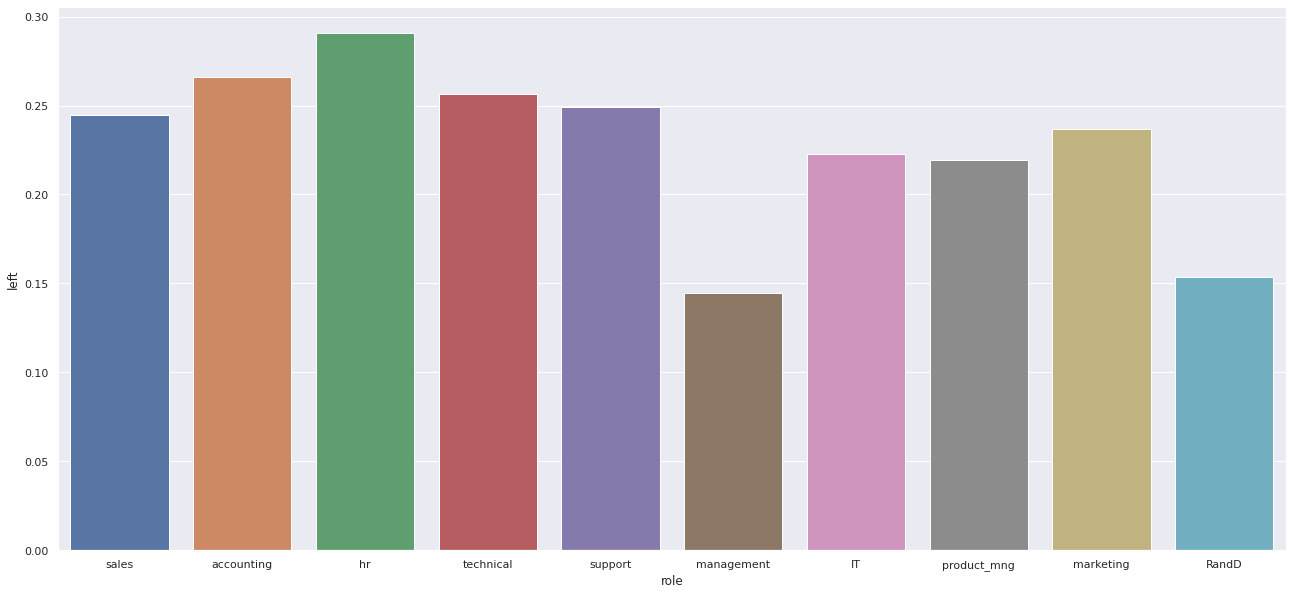

In [ ]:
ax = sns.barplot(x="role", y="left", data=df, ci=None)

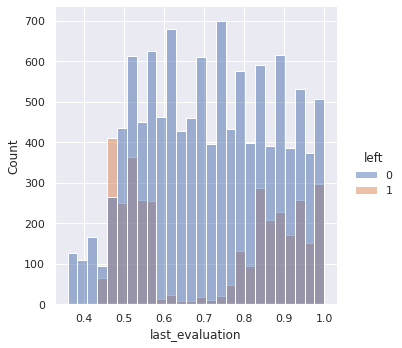

In [ ]:
ax = sns.displot(x="last_evaluation", hue="left", data=df)


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
inputs = ['satisfaction_level', 'number_project']

In [ ]:
X=df[inputs]
y=df['left']

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state = 1 )

In [ ]:
logmodel = LogisticRegression() # to initialise the model
logmodel.fit(X_train, y_train) # to build the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
accuracy_score(y_test, predictions)

0.7695555555555555

In [ ]:
predict = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/hr_predict.csv")

X_predict = predict[inputs]

predictions = logmodel.predict(X_predict)
predict['left_predict'] = predictions
# create new column
predict

#predict unseen data

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,0
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12162,Robert Davis,0.45,0.51,2,147,3,0,0,sales,low,1,1,0
96,14646,Kevin Reid,0.41,0.47,2,135,3,0,0,support,low,1,3,0
97,10385,Mary Valdez,0.99,0.50,4,173,3,0,0,management,low,1,11,0
98,9524,William Jaeger,0.74,0.55,5,168,4,0,0,management,low,1,11,0


In [ ]:
predict.to_csv("final_prediction.csv")

In [ ]:
predictions = logmodel.predict_proba(X_predict)
predict['left_predict'] = predictions
predict

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0.875014
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0.849910
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0.741755
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,0.595762
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0.916177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12162,Robert Davis,0.45,0.51,2,147,3,0,0,sales,low,1,1,0.624649
96,14646,Kevin Reid,0.41,0.47,2,135,3,0,0,support,low,1,3,0.585973
97,10385,Mary Valdez,0.99,0.50,4,173,3,0,0,management,low,1,11,0.950662
98,9524,William Jaeger,0.74,0.55,5,168,4,0,0,management,low,1,11,0.888667


In [ ]:
predictions = logmodel.predict_proba(X_predict)
predictions

array([[0.8750145 , 0.1249855 ],
       [0.84991017, 0.15008983],
       [0.74175536, 0.25824464],
       [0.59576239, 0.40423761],
       [0.91617745, 0.08382255],
       [0.86111145, 0.13888855],
       [0.92780798, 0.07219202],
       [0.42024187, 0.57975813],
       [0.46494023, 0.53505977],
       [0.5361513 , 0.4638487 ],
       [0.9192355 , 0.0807645 ],
       [0.89838084, 0.10161916],
       [0.92715815, 0.07284185],
       [0.42777241, 0.57222759],
       [0.77694212, 0.22305788],
       [0.87937656, 0.12062344],
       [0.93494922, 0.06505078],
       [0.95296214, 0.04703786],
       [0.8573824 , 0.1426176 ],
       [0.93849416, 0.06150584],
       [0.91053428, 0.08946572],
       [0.90718004, 0.09281996],
       [0.63409532, 0.36590468],
       [0.95474449, 0.04525551],
       [0.8877073 , 0.1122927 ],
       [0.44724669, 0.55275331],
       [0.58597292, 0.41402708],
       [0.87395401, 0.12604599],
       [0.84718919, 0.15281081],
       [0.7339224 , 0.2660776 ],
       [0.

In [ ]:
predictions = logmodel.predict_proba(X_predict)
left_proba, stay_proba = predictions.T
predict['left_ratio'] = left_proba
predict['stay_ratio'] = stay_proba
predict.head()

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict,left_ratio,stay_ratio
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0.875014,0.875014,0.124986
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0.849910,0.849910,0.150090
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0.741755,0.741755,0.258245
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,0.595762,0.595762,0.404238
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0.916177,0.916177,0.083823
